- 코드 출처 : https://opencv-python.readthedocs.io/en/latest/index.html

In [10]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

# 이미지 이진화 (Image Thesholding)


## 기본 임계 처리
- 이진화 : 영상을 흑/백으로 분류하여 처리하는 것

  - 기준이 되는 임계값을 어떻게 결정할 것인지가 중요한 문제!
  
  - 임계값보다 크면 백, 작으면 흑이 되는데,  
    기본 임계처리는 사용자가 고정된 임계값을 결정하고 그 결과를 보여주는 단순한 형태

- 기본적으로 이미지의 segmenting의 가장 간단한 방법

- `cv2.threshold()`

  - Parameters  
    - `src` : input image로 single-channel 이미지.(grayscale 이미지)
    
    - `thresh` : 임계값

    - `maxval` : 임계값을 넘었을 때 적용할 value

    - `type` : thresholding type

  <br>

  - thresholding type
    - `cv2.THRESH_BINARY`  
      - src(x, y) > thresh 일 때, maxval

      - 그 외, 0

    - `cv2.THRESH_BINARY_INV`
      - src(x, y) > thresh 일 때, 0

      - 그 외, maxval

    - `cv2.THRESH_TRUNC`
      - src(x, y) > thresh 일 때, thresh

      - 그 외, src(x, y)

    - `cv2.THRESH_TOZERO`
      - src(x, y) > thresh 일 때, src(x, y)

      - 그 외, 0

    - `cv2.THRESH_TOZERO_INV`
      - src(x, y) > thresh 일 때, 0

      - 그 외, src(x, y)

* letters.jpg

  <img src="https://cdn.pixabay.com/photo/2018/09/26/09/07/letters-3704026_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/illustrations/letters-school-learn-alphabet-abc-3704026/</sub>

In [11]:
img = cv2.imread('./img/letters.jpg', cv2.IMREAD_GRAYSCALE)

In [12]:
img.shape

(426, 640)

In [13]:
ret, thresh_1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
ret, thresh_2 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
ret, thresh_3 = cv2.threshold(img, 128, 255, cv2.THRESH_TRUNC)
ret, thresh_4 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO)
ret, thresh_5 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO_INV)

In [14]:
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
imgs = [img, thresh_1, thresh_2, thresh_3, thresh_4, thresh_5]

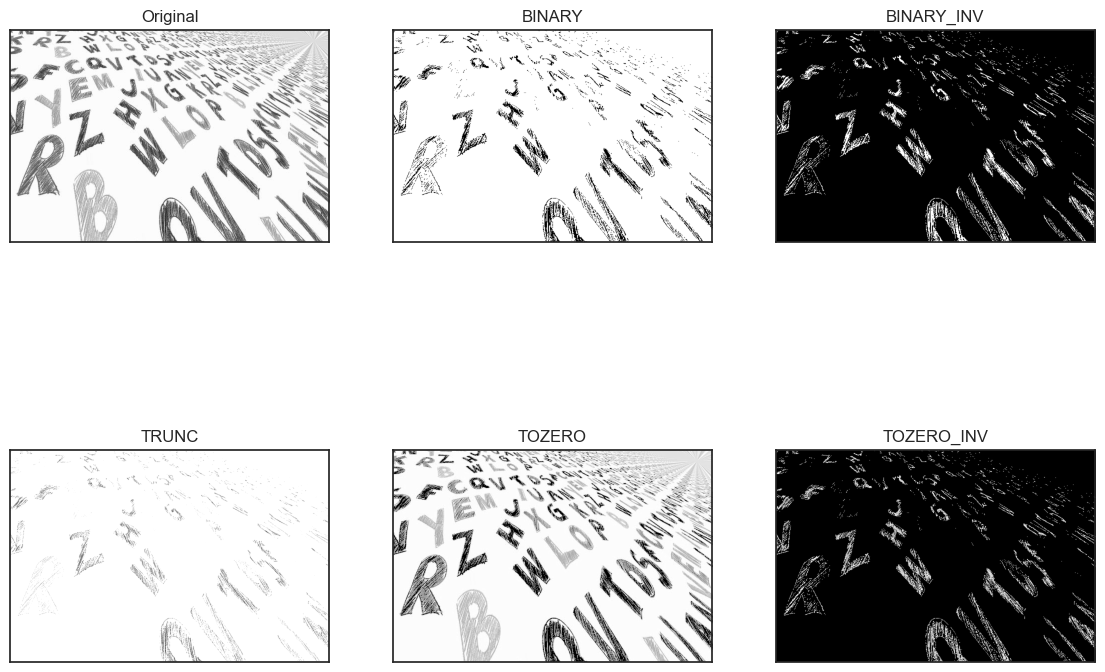

In [15]:
plt.figure(figsize=(14, 10))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(imgs[i], cmap='gray')

plt.show()

- 이미지
  - snow.jpg

  <img src="https://cdn.pixabay.com/photo/2014/12/02/22/05/snowflake-554635_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/illustrations/snowflake-snow-snowing-winter-cold-554635/</sub>

In [16]:
img_2 = cv2.imread('./img/snow.jpg')

In [17]:
img_2.shape

(426, 640, 3)

In [18]:
ret, thresh_1 = cv2.threshold(img_2, 128, 255, cv2.THRESH_BINARY)
ret, thresh_2 = cv2.threshold(img_2, 128, 255, cv2.THRESH_BINARY_INV)
ret, thresh_3 = cv2.threshold(img_2, 128, 255, cv2.THRESH_TRUNC)
ret, thresh_4 = cv2.threshold(img_2, 128, 255, cv2.THRESH_TOZERO)
ret, thresh_5 = cv2.threshold(img_2, 128, 255, cv2.THRESH_TOZERO_INV)

- 시각화

In [19]:
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
imgs = [img_2, thresh_1, thresh_2, thresh_3, thresh_4, thresh_5]

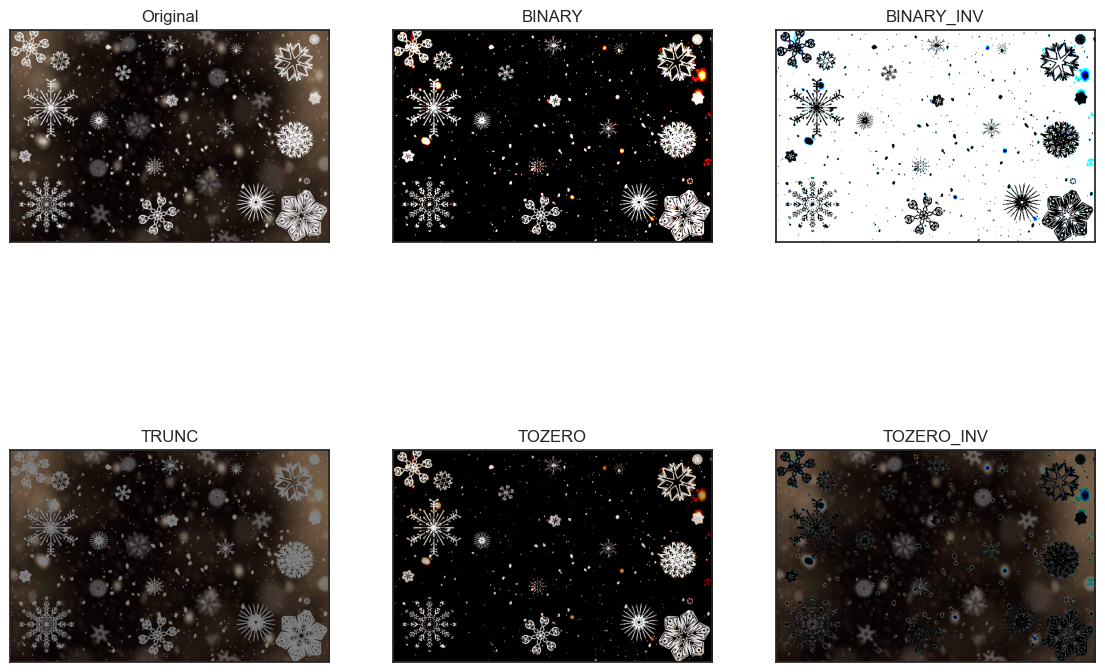

In [20]:
plt.figure(figsize=(14, 10))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(imgs[i], cmap='gray')

plt.show()

## 적응 임계처리

- 이전 단계에서는 임계값을 이미지 전체에 적용하여 처리하기 때문에  
  하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 됨

- 이런 문제를 해결하기 위해서 이미지의 작은 영역별로 thresholding

- `cv2.adaptiveThreshold()`

  - Parameters  
    - `src` : grayscale image

    - `maxValue` : 임계값

    - `adaptiveMethod` : thresholding value를 결정하는 계산 방법

    - `thresholdType` : threshold type

    - `blockSize` : thresholding을 적용할 영역 사이즈

    - `C` : 평균이나 가중평균에서 차감할 값

  <br>
  
  - Adaptive Method
    - `cv2.ADAPTIVE_THRESH_MEAN_C` : 주변영역의 평균값으로 결정

    - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : 주변영역의 가우시안 값으로 결정


In [21]:
img = cv2.imread('./img/letters.jpg', cv2.IMREAD_GRAYSCALE)

In [22]:
ret, th_1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

In [23]:
th_2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
th_3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

- 시각화

In [24]:
titles = ['Original', 'Global', 'Mean', 'Gaussian']
imgs = [img, th_1, th_2, th_3]

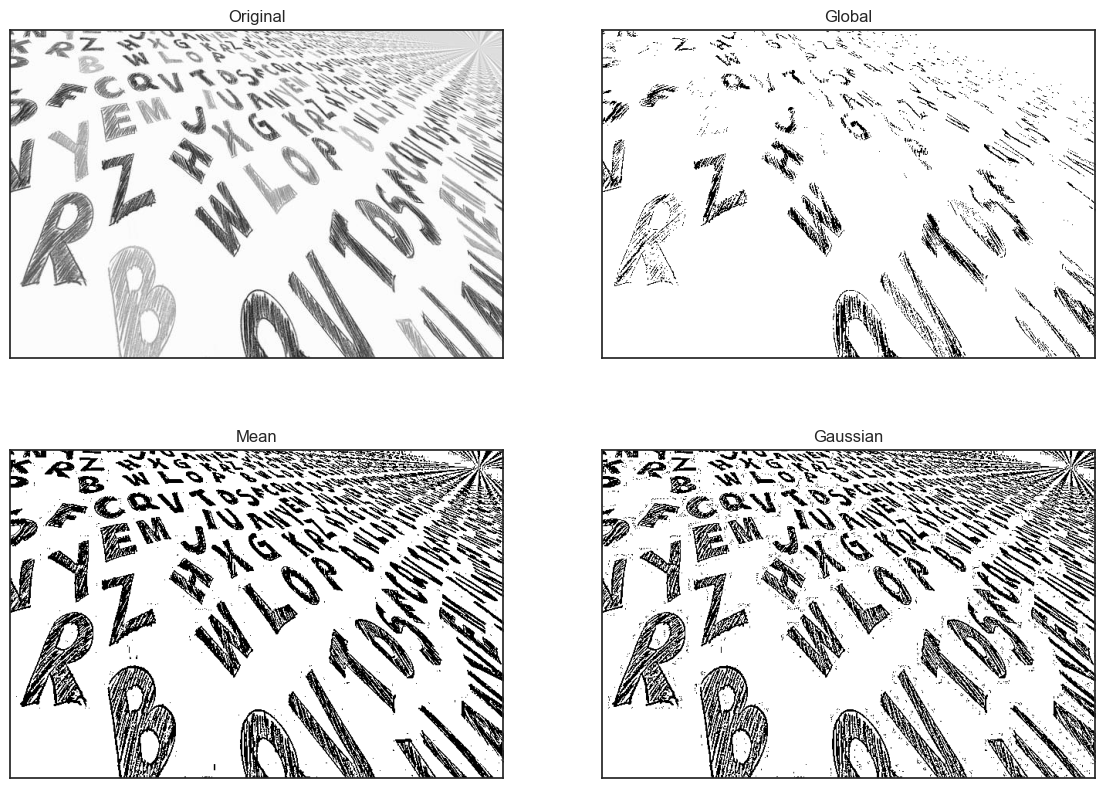

In [26]:
plt.figure(figsize=(14, 10))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    
    plt.imshow(imgs[i], cmap='gray')

    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

## Otsu의 이진화
- `Otsu의 이진화`(Otsu’s Binarization)란 bimodal image에서 임계값을 자동으로 계산하는 것

- 임계값을 결정하는 가장 일반적인 방법은 trial and error 방식

- bimodal image (히스토그램으로 분석하면 2개의 peak가 있는 이미지)의 경우는 히스토그램에서 임계값을 어느정도 정확히 계산 가능

- `cv2.threshold()` 함수의 flag에 추가로 `cv2.THRESH_OTSU` 를 적용.
  이때 임계값은 0으로 전달

- 이미지
  - noise.jpg

  <img src="https://cdn.pixabay.com/photo/2017/01/04/13/09/star-1951963_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/illustrations/star-grey-noise-banner-monochrome-1951963/</sub>

In [28]:
img = cv2.imread('./img/noise.jpg', cv2.IMREAD_GRAYSCALE)

In [30]:
img.shape

(360, 640)

In [29]:
ret_1, th_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret_2, th_2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret_3, th_3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

- 시각화

In [31]:
imgs = [img, 0, th_1, img, 0, th_2, blur, 0, th_3]
titles = [
    'Original Image', 'Histogram', 'Global Thresholding',
    'Original Image', 'Histogram', 'Otsu Thresholding',
    'Gaussian filtered Image', 'Histogram', 'Otsu Thresholding',
]

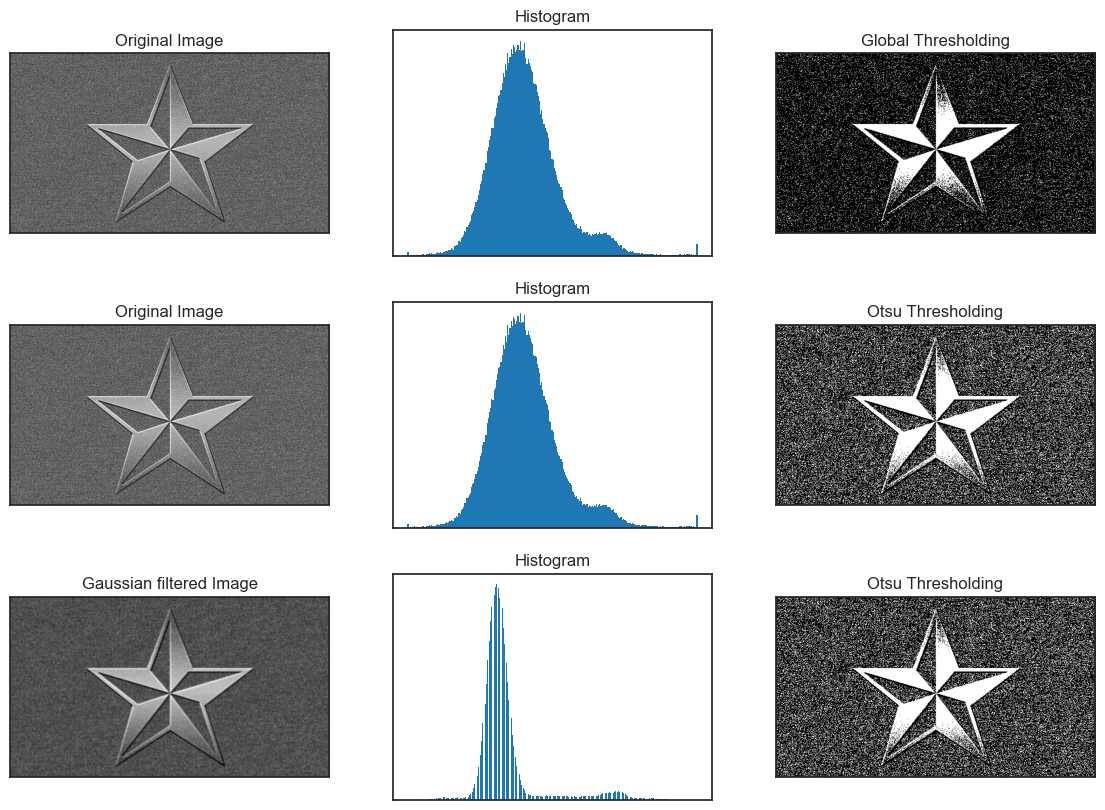

In [34]:
plt.figure(figsize=(14, 10))

for i in range(3):
    plt.subplot(3, 3, i*3 + 1)
    
    plt.imshow(imgs[i*3], cmap='gray')

    plt.title(titles[i*3])
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 3, i*3 + 2)

    plt.hist(imgs[i*3].ravel(), 256)

    plt.title(titles[i*3 + 1])
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3, 3, i*3 + 3)

    plt.imshow(imgs[i*3 + 2], cmap='gray')

    plt.title(titles[i*3 + 2])
    plt.xticks([])
    plt.yticks([])

plt.show()